# 2.iii.spectral clustering algorithm
## Name : Gobinath Periyasamy
## Roll No : CS21M501

In [336]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sys
from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform

In [337]:
data = pd.read_csv("Dataset.csv",header = None,prefix= 'Column_')
X = data.to_numpy()

In [338]:
X

array([[ 0.143  ,  0.98493],
       [-0.30467,  0.98562],
       [ 0.46625, -0.84003],
       ...,
       [ 6.1062 , -5.9864 ],
       [-7.4094 , -5.5205 ],
       [-0.12948, -8.8036 ]])

In [339]:
euclidean_distance = pdist(X, 'sqeuclidean')#computes pairwise euclidean distance betwwen the vectors
distance_matrix= squareform(euclidean_distance)
distance_matrix

array([[  0.        ,   0.20040891,   3.43496956, ...,  84.15919621,
         99.35936524,  95.88956491],
       [  0.20040891,   0.        ,   3.92731557, ...,  89.70831704,
         92.80678583,  95.85951974],
       [  3.43496956,   3.92731557,   0.        , ...,  58.29416018,
         83.93266234,  63.77334138],
       ...,
       [ 84.15919621,  89.70831704,  58.29416018, ...,   0.        ,
        182.88850617,  46.8203209 ],
       [ 99.35936524,  92.80678583,  83.93266234, ..., 182.88850617,
          0.        ,  63.77598082],
       [ 95.88956491,  95.85951974,  63.77334138, ...,  46.8203209 ,
         63.77598082,   0.        ]])

## Kernel = (1 + x.T @ y) d for d = 2 looks Circular plot so we take it for Spectral

In [369]:
gamma = 1
K = (1 + ((X)@ (X.T)))**2
#K
# K = (1+np.dot(X,X.transpose()))**3
# sig = 0.9
# gamma = 1/(2*(sig**2))

# Y = X.transpose()

# K = np.exp(-gamma * distance_matrix)

In [370]:
#Centering the kernel matrix
N = K.shape[0] # number of samples
ones = np.ones((N,N)) / N
K = K - ones @ K - K @ ones + ones @ K @ ones

In [371]:
#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])

In [372]:
eigenvecs

array([[-0.0216369 , -0.00218602,  0.02203242, ..., -0.03737634,
        -0.04258482, -0.02174333],
       [-0.02193616, -0.00284154,  0.02147589, ..., -0.2999486 ,
        -0.55495451,  0.13695443],
       [-0.02234344, -0.00269801,  0.0213343 , ..., -0.28014093,
         0.10194367, -0.04898566],
       ...,
       [-0.00159556, -0.05550981, -0.07025395, ...,  0.01856283,
        -0.04513086, -0.04239177],
       [ 0.05062236,  0.08371748, -0.01749212, ...,  0.00565862,
         0.06589414, -0.02095777],
       [ 0.07297801, -0.04128522,  0.01032308, ..., -0.02871976,
        -0.05099364, -0.01200866]])

In [373]:
#Normalization
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)

In [374]:
#Project the data onto top 2 eigenvectors
projected_data = np.dot(K , principal_components )

<AxesSubplot:>

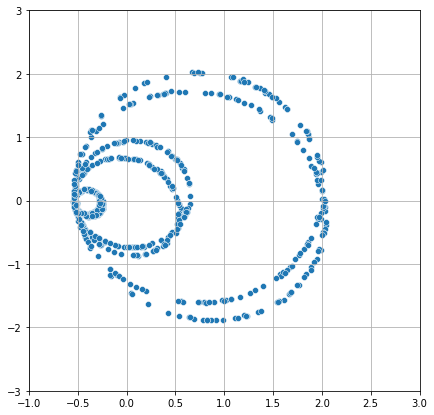

In [375]:
plt.figure(figsize = (7,7))
plt.grid()
plt.xlim(-1,3)
plt.ylim(-3,3)
sb.scatterplot(x = projected_data[:,0], y = projected_data[:,1], palette= 'Accent')

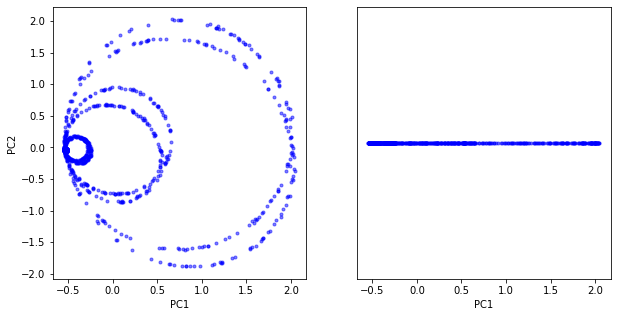

In [396]:
#Visualiation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='.', alpha=0.5)
#ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='.', alpha=0.5)
#ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

In [377]:
X = projected_data
#Samples and featurees
n_samples = X.shape[0]
n_features = X.shape[1]
n_clusters = 4

In [378]:
def centroid_initialization(X , n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    #initial assignment (random)
    for i in range(n_clusters):
        centroid_current_cluster = X[np.random.choice(range(n_samples))]
        centroids[i] = centroid_current_cluster

    return centroids

In [379]:
centroids = centroid_initialization(X, n_clusters)
centroids

array([[ 0.30025675, -0.7746523 ],
       [-0.53531514, -0.02131227],
       [-0.5328175 , -0.06098011],
       [ 1.94891564,  0.42953671]])

In [380]:
def cluster_assignment(X, centroids , n_clusters):
    current_clusters = [[] for i in range(n_clusters)]

    for index, data_point in enumerate(X):
        nearest_centroid = np.argmin(
            np.sqrt(np.sum((data_point - centroids) ** 2, axis=1))
        )
        current_clusters[nearest_centroid].append(index)

    return current_clusters

In [381]:
current_clusters = cluster_assignment(X , centroids, n_clusters)
current_clusters

[[500,
  502,
  503,
  507,
  508,
  509,
  511,
  518,
  520,
  524,
  527,
  528,
  529,
  530,
  532,
  533,
  547,
  549,
  550,
  552,
  554,
  556,
  557,
  559,
  560,
  561,
  566,
  569,
  574,
  575,
  577,
  580,
  584,
  585,
  586,
  587,
  590,
  593,
  594,
  597,
  599,
  600,
  602,
  604,
  606,
  609,
  611,
  612,
  613,
  614,
  615,
  619,
  621,
  622,
  630,
  631,
  633,
  634,
  638,
  639,
  640,
  642,
  646,
  647,
  651,
  652,
  658,
  660,
  672,
  681,
  682,
  684,
  685,
  686,
  687,
  688,
  689,
  691,
  697,
  700,
  702,
  706,
  709,
  711,
  714,
  717,
  721,
  725,
  731,
  733,
  741,
  742,
  743,
  749,
  750,
  753,
  763,
  764,
  765,
  769,
  771,
  773,
  775,
  777,
  780,
  781,
  783,
  787,
  788,
  790,
  794,
  799,
  811,
  812,
  816,
  818,
  819,
  823,
  825,
  826,
  827,
  830,
  831,
  836,
  839,
  843,
  845,
  848,
  850,
  855,
  858,
  859,
  864,
  866,
  870,
  871,
  883,
  884,
  888,
  889,
  899,
  900,
  901,

In [382]:
def update_centroids(X, current_clusters, n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    for index, cluster in enumerate(current_clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[index] = new_centroid

    return centroids

In [383]:
update_centroids(X , current_clusters, n_clusters)

array([[ 0.55066716, -0.91938493],
       [-0.31990018,  0.30370176],
       [-0.45694389, -0.14835347],
       [ 1.59953477,  0.73759758]])

In [384]:
n_iter = 1000
centroids = centroid_initialization(X, n_clusters)
for it in range(n_iter):
    clusters = cluster_assignment(X, centroids,n_clusters)
    previous_centroids = centroids.copy()
    centroids = update_centroids(X, clusters,n_clusters)
    diff = centroids - previous_centroids
    print(diff)
    if not diff.any():
        print("K-Means Converged")
        break

[[ 0.13518042 -0.45751776]
 [ 0.49216014 -0.39464015]
 [ 0.14324367  0.1506153 ]
 [ 0.47238963 -0.93601129]]
[[ 0.05833464 -0.04244601]
 [ 0.43584026 -0.4027795 ]
 [-0.07288616 -0.1238299 ]
 [ 0.12285659 -0.32271671]]
[[ 0.04761867  0.01663659]
 [ 0.24083534 -0.13275206]
 [ 0.00653386 -0.03704739]
 [ 0.05619811 -0.02435719]]
[[ 0.03830798  0.01739527]
 [ 0.1130884  -0.03052013]
 [ 0.00631214 -0.01270497]
 [ 0.02582937  0.03395826]]
[[ 0.00997568  0.00680456]
 [ 0.03141909 -0.01675002]
 [ 0.00577656 -0.0032973 ]
 [ 0.00708439  0.00575259]]
[[ 0.00474661  0.01250681]
 [ 0.0081047  -0.01470475]
 [ 0.00538695 -0.00088244]
 [ 0.00817096 -0.01637143]]
[[ 0.00000000e+00  0.00000000e+00]
 [ 1.58785795e-03 -6.45693900e-03]
 [ 1.56028921e-03 -1.10017431e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
K-Means Converged


In [385]:
#Assigning clusters_ids to all data points
y_pred = np.zeros(n_samples)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        y_pred[index] = cluster_id

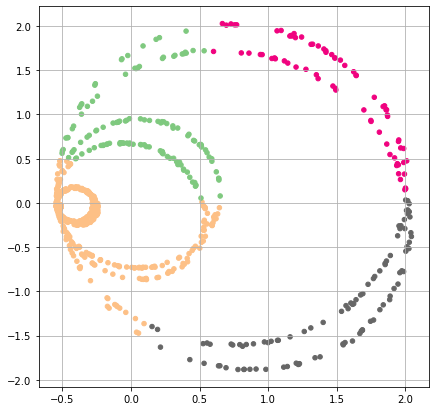

In [401]:
#Visualization
plt.figure(figsize = (7,7))
plt.grid()

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap= 'Accent')

In [387]:
def plot( centroids):
    plt.scatter(X[:, 0], X[:, 1], color = 'green', label = 'data')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],color = 'black', label = 'previous centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], color = 'red', label = 'next one centroid')
    plt.title('Select % d th centroid'%(centroids.shape[0]))
     
    #plt.legend()
#     plt.xlim(-5, 12)
#     plt.ylim(-10, 15)
    plt.show()

In [388]:
def distance(p1, p2):
    return np.sum((p1 - p2)**2)

In [399]:
def initialize_kmeans_plus(X, k):
    centroids = []
    centroids.append(X[np.random.choice(range(n_samples))])
    plot(np.array(centroids))
    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):
         
        ## List to store distances of data from the nearest mean
        dist = []
        for i in range(X.shape[0]):
            point = X[i, :]
            d = sys.maxsize
             
            #finding closest centroid for 'point' from so far selected centroids 
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
             
        # select a data point as next centroid with probability proportional to above distance
        dist = np.array(dist)
        p = dist / np.sum(dist)
        index = np.random.choice(range(n_samples), p = p)
        next_centroid = X[index, :]
        #next_centroid = X[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plt.figure(figsize = (7,7))
        plt.grid()
        plot( np.array(centroids))
    return centroids
  



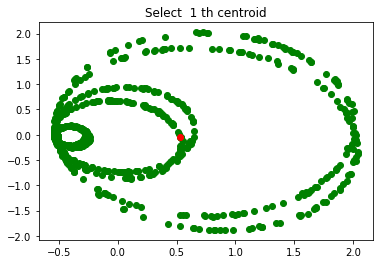

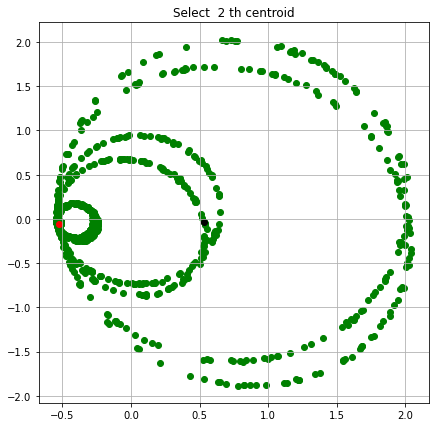

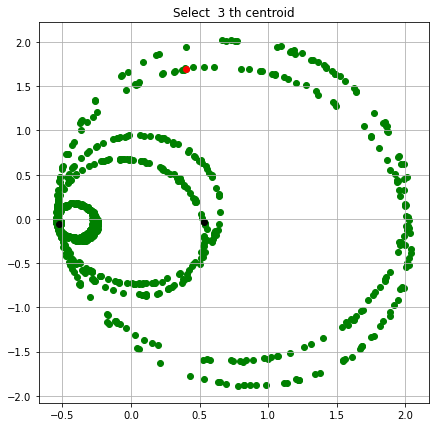

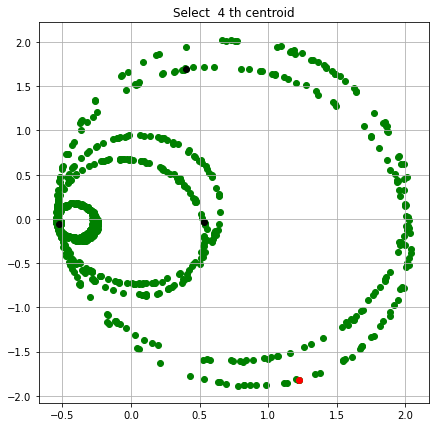

In [400]:
centroids = initialize_kmeans_plus(X, k = 4)

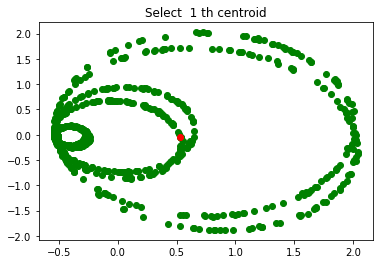

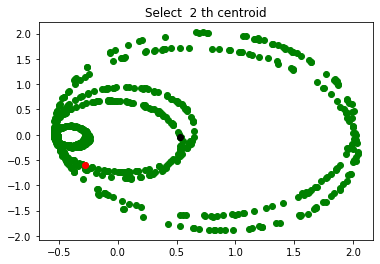

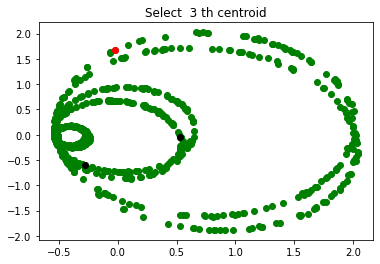

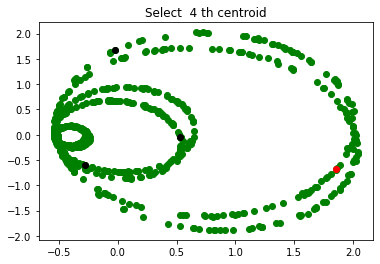

[[-0.10910763  0.32173845]
 [-0.12143915  0.44754656]
 [ 0.49449122 -0.28168358]
 [-0.19489941 -0.08059973]]
[[-0.09202134 -0.01331073]
 [-0.01070217  0.03747412]
 [ 0.25417107  0.04690238]
 [-0.09981923 -0.13084728]]
[[-0.07405545  0.10478924]
 [-0.00571172  0.00153045]
 [ 0.28312317  0.07931789]
 [-0.03400189 -0.09400878]]
[[-0.05193116  0.09142854]
 [ 0.00750136 -0.0105389 ]
 [ 0.12106971 -0.05976466]
 [-0.03895982 -0.09026157]]
[[-0.04308982  0.07583236]
 [ 0.00466376 -0.00652231]
 [ 0.10025277 -0.03307584]
 [-0.02305518 -0.03133335]]
[[-0.02091635  0.04105783]
 [ 0.00574488 -0.00363048]
 [ 0.0375626  -0.018171  ]
 [-0.00507576 -0.01389836]]
[[-0.00794739  0.03416269]
 [ 0.00414132 -0.00072551]
 [ 0.02704664 -0.00741311]
 [ 0.          0.        ]]
[[ 0.00073178  0.00712953]
 [ 0.          0.        ]
 [ 0.01306255 -0.00314418]
 [ 0.          0.        ]]
[[-0.00295157  0.00605178]
 [ 0.00140627 -0.00015279]
 [ 0.          0.        ]
 [ 0.          0.        ]]
[[-0.00947419  0.01

In [391]:
n_iter = 1000
centroids = initialize_kmeans_plus(X, k = 4)
for it in range(n_iter):
    clusters = cluster_assignment(X, centroids,n_clusters)
    previous_centroids = centroids.copy()
    centroids = update_centroids(X, clusters,n_clusters)
    diff = centroids - previous_centroids
    print(diff)
    if not diff.any():
        print("K-Means Converged")
        break

In [392]:
#Assigning clusters_ids to all data points
y_pred = np.zeros(n_samples)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        y_pred[index] = cluster_id

## Spectral Clustering Plots

<AxesSubplot:title={'center':'Spectral Clustering'}, xlabel='Column_0', ylabel='Column_1'>

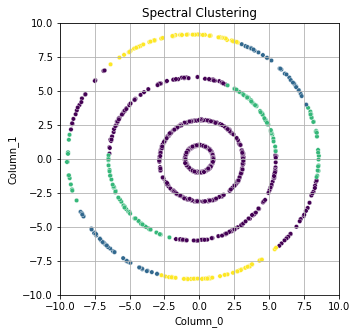

In [368]:
#Visualization
X = pd.read_csv("Dataset.csv",header = None,prefix= 'Column_')
plt.figure(figsize = (5,5))
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Spectral Clustering')
sb.scatterplot(x = X['Column_0'], y = X["Column_1"], c=y_pred, s=20, palette= 'Accent')